## Name: Adebesin Aramide
## Financial Inclusion in Africa
## Task: Predict the likelihood of Individuals having a bank account in East Africa

In [400]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [401]:
#loading the dataset and printing the shape of the dataset i.e the number of rows and columns
train = pd.read_csv("Train.csv")  
variables = pd.read_csv("VariableDefinitions.csv")
print(train.shape)
print(variables.shape)

(23524, 13)
(12, 2)


In [402]:
#displaying the first five rows of the training dataset
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [403]:
#displaying the information about the train dataset i.e the columns, datatype, no of entries
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [404]:
#checking for null values in the train dataset
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

We observe that the dataset is clean. No null values

In [405]:
#dropping the uniqueid column, it is not needed for our analysis
train.drop(columns = ["uniqueid"] , axis = 1, inplace = True)

In [406]:
#displaying the columns in the train dataset
train.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [407]:
#the column names and the meaning
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [408]:
#displaying the statistics of the continuous column in the train dataset
train.describe()

,year,household_size,age_of_respondent
count,23524.00,23524.00,23524.00
mean,2016.98,3.80,38.81
std,0.85,2.23,16.52
min,2016.00,1.00,16.00
25%,2016.00,2.00,26.00
50%,2017.00,3.00,35.00
75%,2018.00,5.00,49.00
max,2018.00,21.00,100.00


## Exploratory Data Analysis

In [409]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.2+ MB


In [410]:
#displaying the values of the classes in the bank account column
train["bank_account"].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

It is observed that the dataset is imbalanced since the class in the target column have huge difference

In [411]:
#Splitting the bank_ account column into two classes "Yes" and "No"
Yes = train[train["bank_account"] == "Yes"]
No = train[train["bank_account"] == "No"]

In [412]:
#displaying the shape of the new variables that contain the splitted classes of the bank_account
print(Yes.shape)
print(No.shape)

(3312, 12)
(20212, 12)


#### Using Undersampling to solve the issue of the imbalanced dataset

In [413]:
#picking 3312 samples out of 20212 values in the No variable
No_sample = No.sample(n=3312)
print(No_sample.shape)

(3312, 12)


In [414]:
#Concatenating the two dataframes, now we have a new dataframe
new_df = pd.concat([No_sample, Yes], axis= 0)
print(new_df.head())
print(new_df.shape)

      country  year bank_account location_type cellphone_access  \
21842  Uganda  2018           No         Rural              Yes   
11660  Rwanda  2016           No         Rural               No   
10447  Rwanda  2016           No         Rural              Yes   
2379    Kenya  2018           No         Urban               No   
7352   Rwanda  2016           No         Rural              Yes   

       household_size  age_of_respondent gender_of_respondent  \
21842               2                 52                 Male   
11660               4                 31               Female   
10447               3                 85               Female   
2379                5                 17               Female   
7352                9                 45               Female   

      relationship_with_head           marital_status      education_level  \
21842      Head of Household  Married/Living together    Primary education   
11660                 Spouse  Married/Living toget

In [415]:
#displaying the new values of the classes in the bank account column
new_df["bank_account"].value_counts()

No     3312
Yes    3312
Name: bank_account, dtype: int64

It is observed that the classes in the bank account column now have the same number of values, hereby rectifying the imbalance in the dataset

In [416]:
cat_cols = ["country", "bank_account", "location_type", "cellphone_access",
             "gender_of_respondent",
             "relationship_with_head",
             "marital_status",
             "education_level",
             "job_type"]

In [417]:
#displaying the unique and number of unique values in the categorical columns
for col in cat_cols:
    print(new_df[col].unique())
    print(new_df[col].nunique())

['Uganda' 'Rwanda' 'Kenya' 'Tanzania']
4
['No' 'Yes']
2
['Rural' 'Urban']
2
['Yes' 'No']
2
['Male' 'Female']
2
['Head of Household' 'Spouse' 'Child' 'Other relative' 'Parent'
 'Other non-relatives']
6
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
5
['Primary education' 'No formal education' 'Secondary education'
 'Tertiary education' 'Vocational/Specialised training'
 'Other/Dont know/RTA']
6
['Self employed' 'Farming and Fishing' 'Remittance Dependent'
 'Informally employed' 'No Income' 'Other Income'
 'Formally employed Private' 'Government Dependent'
 'Formally employed Government' 'Dont Know/Refuse to answer']
10


In [418]:
#displaying the values of the classes in the job type column
new_df["job_type"].value_counts()

Self employed                   1752
Farming and Fishing             1450
Informally employed             1250
Formally employed Private        666
Remittance Dependent             627
Other Income                     333
Formally employed Government     316
No Income                        115
Government Dependent              85
Dont Know/Refuse to answer        30
Name: job_type, dtype: int64

Majority of the people that responded to the survey are self employed 

In [419]:
#displaying the values of the classes in the marital_status column
new_df["marital_status"].value_counts()

Married/Living together    3341
Single/Never Married       2129
Widowed                     640
Divorced/Seperated          512
Dont know                     2
Name: marital_status, dtype: int64

Majority of the people that responded to the survey are Married/Living together

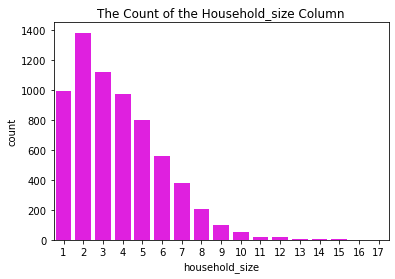

In [420]:
sns.countplot(new_df.household_size, color = "magenta")
plt.title("The Count of the Household_size Column");

It can be observed that majority that answered the survey are from the household_size of 2,3,4 respectively

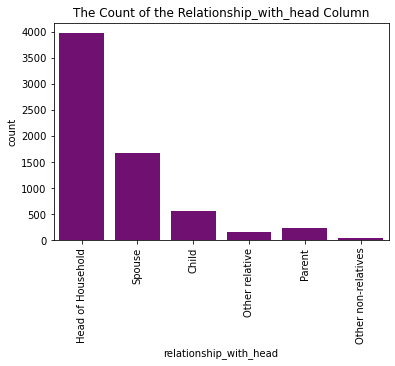

In [421]:
sns.countplot(new_df.relationship_with_head, color = "purple")
plt.xticks(rotation = 90)
plt.title("The Count of the Relationship_with_head Column");

It can be observed that majority that answered the survey is the Head of the Household followed by the spouse

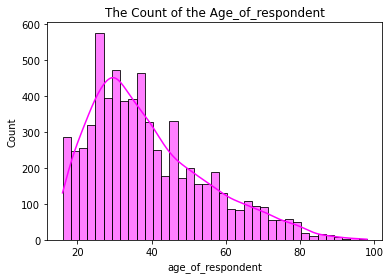

In [422]:
sns.histplot(new_df.age_of_respondent, kde = True, color = "magenta")
plt.title("The Count of the Age_of_respondent");

It is observed from the above histogram that majority that answered this survey are between the range of 30 to 40

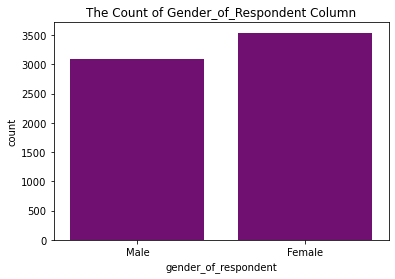

In [423]:
sns.countplot(new_df.gender_of_respondent, color = "purple")
plt.title("The Count of Gender_of_Respondent Column");

Majority of the people that answered the survey are female

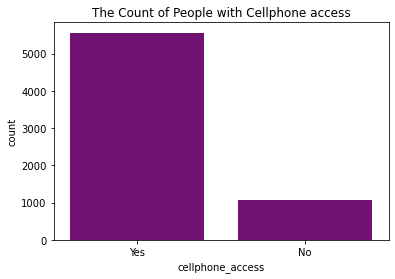

In [424]:
sns.countplot(new_df["cellphone_access"], color = "purple")
plt.title("The Count of People with Cellphone access");

It is observed that majority of the people that answered the survey as access to cellphone

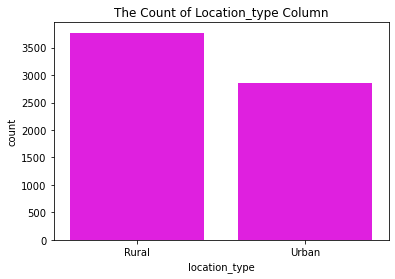

In [425]:
sns.countplot(new_df["location_type"], color= "magenta")
plt.title("The Count of Location_type Column");

Majority of the people that answered the suvey lives in a rural area

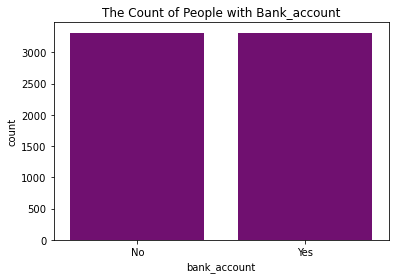

In [426]:
sns.countplot(new_df.bank_account, color = "purple")
plt.title("The Count of People with Bank_account");

Majority of people that answered the survey does not have a bank account despite having access to a cellphone

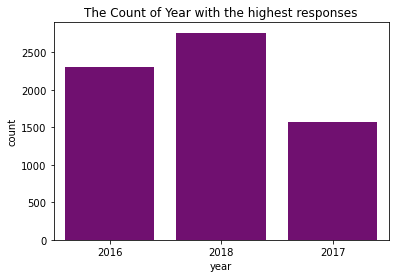

In [427]:
sns.countplot(new_df.year, color = "purple", 
              order=train.year.value_counts().sort_values(ascending=False).index.to_list())
plt.title("The Count of Year with the highest responses");

It is observed that the dataset is filled with more response from the year 2016, though the difference between the other years is little

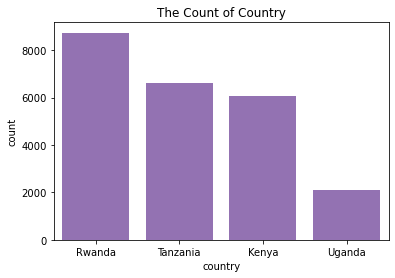

In [428]:
base_color = sns.color_palette()[4]
sns.countplot(train.country, 
              color = base_color, order=train.country.value_counts().sort_values(ascending=False).index.to_list())
plt.title("The Count of Country");

It can be observed thatr majority of the response are from Rwanda followed by Tanzania

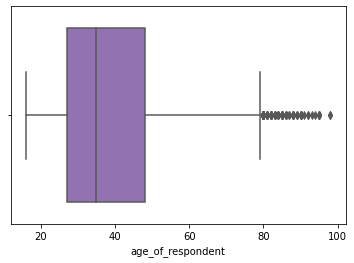

In [429]:
sns.boxplot(new_df.age_of_respondent, color = base_color);

It can be observed that there are several outliers in the Age_of_respondent column. That shows that only few people between the age range of 80 to 100 responded to the survey

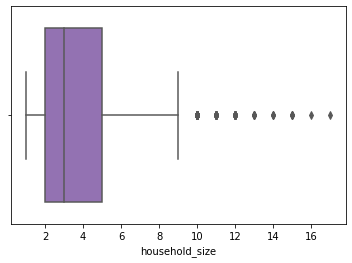

In [430]:
sns.boxplot(new_df.household_size, color= base_color);

In [431]:
#importing the necessary machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [432]:
#using the LabelEncoder library to convert categorical variables to continuous variables
le_bank_account = LabelEncoder()
le_location_type = LabelEncoder()
le_cellphone_access = LabelEncoder()
le_gender_of_respondent = LabelEncoder()
le_relationship_with_head = LabelEncoder()
le_marital_status = LabelEncoder()
le_education_level = LabelEncoder()
le_job_type = LabelEncoder()
le_country = LabelEncoder()

In [433]:
new_df["bank_account"] = le_bank_account.fit_transform(new_df["bank_account"])
new_df["location_type"] = le_location_type.fit_transform(new_df["location_type"])
new_df["cellphone_access"] = le_cellphone_access.fit_transform(new_df["cellphone_access"])
new_df["gender_of_respondent"] = le_gender_of_respondent.fit_transform(new_df["gender_of_respondent"])
new_df["relationship_with_head"] = le_relationship_with_head.fit_transform(new_df["relationship_with_head"])
new_df["marital_status"] = le_marital_status.fit_transform(new_df["marital_status"])
new_df["education_level"] = le_education_level.fit_transform(new_df["education_level"])
new_df["job_type"] = le_bank_account.fit_transform(new_df["job_type"])
new_df["country"] = le_country.fit_transform(new_df["country"])

In [434]:
#splitting into the feature and target variable and also dropping the columns not needed in building the model
X= new_df.drop(columns = ["bank_account"], axis = 1)
y = new_df["bank_account"]

In [435]:
#displaying the first five rows of the independent variable and the shape of the independent variable
print(X.head())
print(X.shape)

       country  year  location_type  cellphone_access  household_size  \
21842        3  2018              0                 1               2   
11660        1  2016              0                 0               4   
10447        1  2016              0                 1               3   
2379         0  2018              1                 0               5   
7352         1  2016              0                 1               9   

       age_of_respondent  gender_of_respondent  relationship_with_head  \
21842                 52                     1                       1   
11660                 31                     0                       5   
10447                 85                     0                       1   
2379                  17                     0                       0   
7352                  45                     0                       5   

       marital_status  education_level  job_type  
21842               2                2         9  
11660         

In [436]:
#displaying the first five rows of our dependent variable and the shape of the dependent variable
print(y.head())
print(y.shape)

21842    0
11660    0
10447    0
2379     0
7352     0
Name: bank_account, dtype: int32
(6624,)


#### Feature Selection

In [437]:
selector = SelectKBest(mutual_info_classif, k=8)
x_new = selector.fit_transform(X,y)

In [438]:
selected_features = selector.get_support(indices=True)
feature_names = X.columns[selected_features]
print(feature_names)

Index(['country', 'year', 'cellphone_access', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'education_level',
       'job_type'],
      dtype='object')


Using the p_values to select the best features for our model

In [439]:
f_scores, p_values = f_classif(X, y)
f_scores_df = pd.DataFrame({"Feature_Name": X.columns, "f_score": f_scores, "p_values": p_values})
f_scores_df.sort_values(by="f_score", ascending=False, inplace=True)
print(f_scores_df)

              Feature_Name  f_score  p_values
9          education_level  1416.45      0.00
3         cellphone_access   934.47      0.00
0                  country   332.95      0.00
6     gender_of_respondent   207.55      0.00
1                     year   180.81      0.00
2            location_type   114.14      0.00
7   relationship_with_head    76.67      0.00
10                job_type    46.52      0.00
8           marital_status    29.40      0.00
4           household_size    13.71      0.00
5        age_of_respondent     5.54      0.02


In [440]:
p_values_df = pd.Series(p_values, index = X.columns)
p_values_df.sort_values(ascending=False, inplace=True)
print(p_values_df)

age_of_respondent        0.02
household_size           0.00
marital_status           0.00
job_type                 0.00
relationship_with_head   0.00
location_type            0.00
year                     0.00
gender_of_respondent     0.00
country                  0.00
cellphone_access         0.00
education_level          0.00
dtype: float64


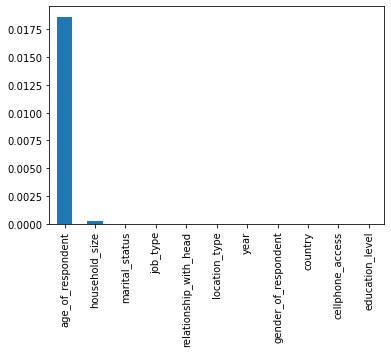

In [441]:
#displaying the features to drop in the independent variable, the column with the highest bar are to be dropped
p_values_df.plot.bar();

In [442]:
#dropping the column that are not necessary for our model based on the p_values
X.drop(columns=["age_of_respondent", "household_size"], inplace=True)
X.head()

,country,year,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
21842,3,2018,0,1,1,1,2,2,9
11660,1,2016,0,0,0,5,2,2,1
10447,1,2016,0,1,0,1,4,0,8
2379,0,2018,1,0,0,0,3,3,8
7352,1,2016,0,1,0,5,2,3,1


#### Checking for Multicollinearity

VIF = 1: There is no correlation between a given predictor variable and any other predictor variables in the model      
VIF  between 1 and 5: There is moderate correlation between a given predictor variable and other predictor variables in the model
VIF > 5: There is severe correlation between a given predictor variable and other predictor variables in the model

In [443]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df.sort_values(by="VIF", ascending=False)

,feature,VIF
1,year,26.35
6,marital_status,7.83
3,cellphone_access,7.10
7,education_level,5.05
8,job_type,4.57
5,relationship_with_head,3.27
4,gender_of_respondent,2.66
0,country,2.53
2,location_type,2.01


In [444]:
#dropping multicollinearity column
X.drop(columns=["year"], axis=1, inplace=True)
X.head()

,country,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
21842,3,0,1,1,1,2,2,9
11660,1,0,0,0,5,2,2,1
10447,1,0,1,0,1,4,0,8
2379,0,1,0,0,0,3,3,8
7352,1,0,1,0,5,2,3,1


In [445]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df.sort_values(by="VIF", ascending=False)

,feature,VIF
2,cellphone_access,5.79
6,education_level,4.71
5,marital_status,4.69
7,job_type,4.23
4,relationship_with_head,2.59
0,country,2.46
3,gender_of_respondent,2.26
1,location_type,2.01


In [474]:
#splitting into the training and testing, training 80% of our data and testing 20% of our data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42, stratify=y)

In [475]:
#displaying the number of rows and columns for our training dataset
print(X_train.shape)
print(y_train.shape)

(5299, 8)
(5299,)


In [476]:
#displaying the number of rows and columns for our testing dataset
print(X_test.shape)
print(y_test.shape)

(1325, 8)
(1325,)


In [477]:
#assigning the variable name model to our LogisticRegression model
model = LogisticRegression()
model

LogisticRegression()

In [478]:
#training the dataset
model.fit(X_train, y_train)

LogisticRegression()

In [479]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7411320754716981

In [473]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       663
           1       0.70      0.80      0.75       662

    accuracy                           0.73      1325
   macro avg       0.74      0.73      0.73      1325
weighted avg       0.74      0.73      0.73      1325

